# **Stock Market Analytics VN30**

**Thành viên :** 
* Lê Huy Hoàng ( 19110319 )
* Đỗ Hữu Quân ( 19110160 )
* Võ Huyền Bảo Hân ( 19110303 )
* Vòng Vĩnh Phú ( 19110413 )

In [1]:
!git clone https://github.com/phamdinhkhanh/vnquant


Cloning into 'vnquant'...


In [1]:
%cd vnquant
!python setup.py install

c:\Users\vongv\OneDrive\Stock-Market-Analytics\vnquant
running install
running bdist_egg
running egg_info
writing vnquant.egg-info\PKG-INFO
writing dependency_links to vnquant.egg-info\dependency_links.txt
writing requirements to vnquant.egg-info\requires.txt
writing top-level names to vnquant.egg-info\top_level.txt
reading manifest file 'vnquant.egg-info\SOURCES.txt'
writing manifest file 'vnquant.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\vnquant
copying build\lib\vnquant\DataLoader.py -> build\bdist.win-amd64\egg\vnquant
copying build\lib\vnquant\Plot.py -> build\bdist.win-amd64\egg\vnquant
copying build\lib\vnquant\utils.py -> build\bdist.win-amd64\egg\vnquant
copying build\lib\vnquant\__init__.py -> build\bdist.win-amd64\egg\vnquant
byte-compiling build\bdist.win-amd64\egg\vnquant\DataLoader.py to DataLoader.cpython-38.pyc
byte-compiling build\

setup.py:13: DeprecationWarning: Due to possible ambiguity, 'convert()' is deprecated and will be removed in pypandoc 1.8. Use 'convert_file()'  or 'convert_text()'.
  read_md = lambda f: convert(f, 'rst')



vnquant 0.0.3 is already the active version in easy-install.pth

Installed c:\users\vongv\anaconda3\lib\site-packages\vnquant-0.0.3-py3.8.egg
Processing dependencies for vnquant==0.0.3
Searching for bs4==0.0.1
Best match: bs4 0.0.1
Processing bs4-0.0.1-py3.8.egg
bs4 0.0.1 is already the active version in easy-install.pth

Using c:\users\vongv\anaconda3\lib\site-packages\bs4-0.0.1-py3.8.egg
Searching for plotly==5.5.0
Best match: plotly 5.5.0
Adding plotly 5.5.0 to easy-install.pth file

Using c:\users\vongv\anaconda3\lib\site-packages
Searching for pypandoc==1.7.4
Best match: pypandoc 1.7.4
Processing pypandoc-1.7.4-py3.8.egg
pypandoc 1.7.4 is already the active version in easy-install.pth

Using c:\users\vongv\anaconda3\lib\site-packages\pypandoc-1.7.4-py3.8.egg
Searching for lxml==4.6.3
Best match: lxml 4.6.3
Adding lxml 4.6.3 to easy-install.pth file

Using c:\users\vongv\anaconda3\lib\site-packages
Searching for wrapt==1.12.1
Best match: wrapt 1.12.1
Adding wrapt 1.12.1 to easy-in

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vnquant.DataLoader as web
import bs4 as bs
import requests

In [3]:
stocks = ['ACB','BID','BVH','CTG','FPT','GAS',
            'GVR','HDB','HPG','KDH','MBB','MSN',
            'MWG','NVL','PDR','PLX','PNJ',
            'POW','SAB','SSI','STB','TCB','TPB','VCB',
            'VHM','VIC','VJC','VNM','VPB','VRE']

In [4]:
loader = web.DataLoader(symbols=stocks,start="2021-03-15",end="2022-03-15",minimal=True,data_source='cafe')
data = loader.download()

c:\Users\vongv\OneDrive\Stock-Market-Analytics\vnquant\vnquant\DataLoader.py:254: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  stock_data['change_perc1'], stock_data['change_perc2'] = stock_data['change_perc'].apply(utils.split_change_col).str
2022-04-04 04:43:27,364 : INFO : data ACB from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:31,351 : INFO : data BID from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:34,195 : INFO : data BVH from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:37,135 : INFO : data CTG from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:39,970 : INFO : data FPT from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:42,700 : INFO : data GAS from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:45,475 : INFO : data GVR from 2021-03-15 to 2022-03-15 have already cloned!
2022-04-04 04:43:48,072 : INFO : data HDB from 2021-03-15 t

In [6]:
data['close']

Symbols,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,33.50,43.00,60.1,38.00,76.5,91.1,30.30,26.65,46.50,31.35,...,18.90,40.10,28.70,96.3,99.8,106.0,135.0,102.2,44.80,34.45
2021-03-16,33.45,42.40,59.6,37.70,81.0,90.3,29.45,26.80,46.10,31.25,...,18.90,39.85,28.50,95.7,99.5,105.4,134.6,101.0,44.35,34.80
2021-03-17,33.50,43.30,59.6,39.55,80.8,92.8,29.70,27.50,46.30,31.50,...,19.60,40.30,28.70,95.6,99.3,104.7,133.5,100.5,44.60,34.85
2021-03-18,33.95,45.00,60.7,40.50,81.0,91.8,30.70,27.50,46.60,32.20,...,19.70,41.95,29.00,97.5,99.7,106.6,134.9,102.5,45.85,35.00
2021-03-19,33.80,45.00,61.0,40.45,79.8,90.9,30.00,27.15,47.15,32.45,...,19.60,42.00,28.90,94.2,97.8,108.4,130.5,101.7,45.20,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,32.70,40.50,56.4,32.00,95.5,122.2,36.00,27.00,49.85,51.20,...,31.10,49.10,38.80,83.0,74.0,78.0,140.0,75.1,36.85,31.60
2022-03-10,32.90,40.95,57.4,32.10,94.6,118.5,35.55,26.95,49.15,51.50,...,31.55,49.25,39.00,83.5,75.2,79.1,139.0,77.1,36.75,32.00
2022-03-11,32.70,41.85,57.0,32.25,93.2,112.9,34.50,27.30,47.60,51.00,...,32.05,48.90,38.65,83.8,75.0,79.0,138.5,78.0,36.40,31.85


In [7]:
closePrice = data['close']
closePrice.shape

(251, 30)

In [31]:
profit =  (closePrice / closePrice.shift(1) ) - 1
profit.head()

Symbols,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-16,-0.001493,-0.013953,-0.008319,-0.007895,0.058824,-0.008782,-0.028053,0.005629,-0.008602,-0.003190,...,0.000000,-0.006234,-0.006969,-0.006231,-0.003006,-0.005660,-0.002963,-0.011742,-0.010045,0.010160
2021-03-17,0.001495,0.021226,0.000000,0.049072,-0.002469,0.027685,0.008489,0.026119,0.004338,0.008000,...,0.037037,0.011292,0.007018,-0.001045,-0.002010,-0.006641,-0.008172,-0.004950,0.005637,0.001437
2021-03-18,0.013433,0.039261,0.018456,0.024020,0.002475,-0.010776,0.033670,0.000000,0.006479,0.022222,...,0.005102,0.040943,0.010453,0.019874,0.004028,0.018147,0.010487,0.019900,0.028027,0.004304
2021-03-19,-0.004418,0.000000,0.004942,-0.001235,-0.014815,-0.009804,-0.022801,-0.012727,0.011803,0.007764,...,-0.005076,0.001192,-0.003448,-0.033846,-0.019057,0.016886,-0.032617,-0.007805,-0.014177,-0.028571


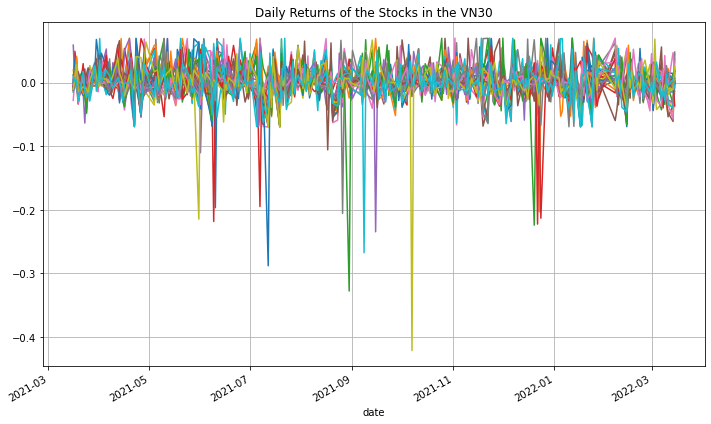

In [9]:
profit.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the VN30')
plt.tight_layout()
plt.savefig('DRSVN30.png')

In [32]:
from numpy.linalg import eigh


In [33]:
# Khử Null 
profit=profit.fillna(0)
profit

Symbols,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-03-16,-0.001493,-0.013953,-0.008319,-0.007895,0.058824,-0.008782,-0.028053,0.005629,-0.008602,-0.003190,...,0.000000,-0.006234,-0.006969,-0.006231,-0.003006,-0.005660,-0.002963,-0.011742,-0.010045,0.010160
2021-03-17,0.001495,0.021226,0.000000,0.049072,-0.002469,0.027685,0.008489,0.026119,0.004338,0.008000,...,0.037037,0.011292,0.007018,-0.001045,-0.002010,-0.006641,-0.008172,-0.004950,0.005637,0.001437
2021-03-18,0.013433,0.039261,0.018456,0.024020,0.002475,-0.010776,0.033670,0.000000,0.006479,0.022222,...,0.005102,0.040943,0.010453,0.019874,0.004028,0.018147,0.010487,0.019900,0.028027,0.004304
2021-03-19,-0.004418,0.000000,0.004942,-0.001235,-0.014815,-0.009804,-0.022801,-0.012727,0.011803,0.007764,...,-0.005076,0.001192,-0.003448,-0.033846,-0.019057,0.016886,-0.032617,-0.007805,-0.014177,-0.028571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,0.003067,-0.026442,-0.034247,-0.001560,0.007384,0.012428,-0.008264,-0.012797,0.008089,-0.017274,...,0.008104,0.002041,0.000000,0.018405,-0.008043,0.001284,0.021898,-0.013141,-0.004054,-0.027692
2022-03-10,0.006116,0.011111,0.017730,0.003125,-0.009424,-0.030278,-0.012500,-0.001852,-0.014042,0.005859,...,0.014469,0.003055,0.005155,0.006024,0.016216,0.014103,-0.007143,0.026631,-0.002714,0.012658
2022-03-11,-0.006079,0.021978,-0.006969,0.004673,-0.014799,-0.047257,-0.029536,0.012987,-0.031536,-0.009709,...,0.015848,-0.007107,-0.008974,0.003593,-0.002660,-0.001264,-0.003597,0.011673,-0.009524,-0.004687


In [34]:
profit = profit - np.mean(profit.T, axis=1)

In [35]:
cov_matrix=np.cov(profit.T)
cov_matrix

array([[ 5.14004112e-04,  2.54365421e-04,  1.01656490e-04,
         2.75925846e-04,  1.01357155e-04,  8.69131700e-05,
         1.80568553e-04,  3.16695246e-04,  9.32111724e-05,
         7.58829350e-05,  3.50199899e-04,  1.11864999e-04,
         1.15570895e-04, -9.24658711e-06,  5.42704675e-05,
         9.18690592e-05,  1.31551209e-04,  9.67498222e-05,
         9.64373001e-07,  2.65396136e-04,  3.12804630e-04,
         2.79918321e-04,  2.95279239e-04,  1.60226430e-04,
         1.45992401e-04,  7.72978333e-05, -1.60030988e-05,
         1.52425083e-05,  1.99110559e-04,  1.24895196e-04],
       [ 2.54365421e-04,  5.89059612e-04,  1.59328026e-04,
         2.53528838e-04,  1.19902454e-04,  1.22985308e-04,
         1.98600824e-04,  3.14791407e-04,  1.42428384e-04,
         9.76937140e-05,  3.62518768e-04,  1.11729602e-04,
         1.06476408e-04,  9.90632588e-06,  1.04678548e-04,
         1.06900115e-04,  1.41682782e-04,  1.84155547e-04,
         1.86786166e-05,  3.11220542e-04,  3.10049032e-

In [36]:
eigvals,eigvecs = eigh(cov_matrix)

In [37]:
explained_variances = []
for i in range(len(eigvals)):
    explained_variances.append(eigvals[i] / np.sum(eigvals))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.005153084344805479, 0.005818364303951278, 0.007423019878724419, 0.00768193415426608, 0.009981709044434161, 0.010406842514225773, 0.01070645635570957, 0.011964160864884109, 0.01290521811557045, 0.014573450839916924, 0.015555871071956722, 0.016304425368947453, 0.016573560804279252, 0.0182916589201378, 0.019090389502747822, 0.019390893091505563, 0.020685442449383053, 0.02151981900343371, 0.02504537944380543, 0.026679232608419933, 0.02768102780625703, 0.030775081441572674, 0.03430136265283954, 0.03598503951911697, 0.03926811715151548, 0.04207000077123555, 0.05164386799129276, 0.05573373269946498, 0.09159433028117471, 0.2951965270044253]


In [59]:
sorted_index = np.argsort(eigvals)[::-1]
sorted_eigenvalue = eigvals[sorted_index]
sorted_eigenvectors = eigvecs[:,sorted_index]


In [61]:
MyPCA = sorted_eigenvectors.T.dot(profit.T)
MyPCA.shape
MyPC1 = MyPCA.T[0]
MyPC1 = pd.Series(index=profit.columns, data=MyPC1)

In [62]:
print(MyPC1.head())
MyPC1.shape

Symbols
ACB   -0.003413
BID   -0.000845
BVH    0.000005
CTG    0.000939
FPT    0.000605
dtype: float64


(30,)

In [63]:
weights = abs(MyPC1)/sum(abs(MyPC1))

<AxesSubplot:xlabel='date'>

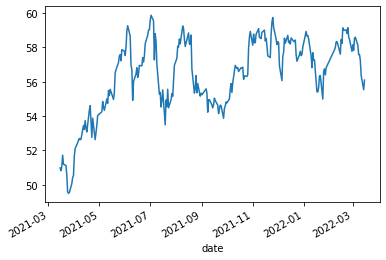

In [64]:
(weights*closePrice).sum(1).plot()

In [24]:
from sklearn.decomposition import PCA

In [23]:
profit =  (closePrice / closePrice.shift(1) ) - 1
profit.head()

Symbols,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-16,-0.001493,-0.013953,-0.008319,-0.007895,0.058824,-0.008782,-0.028053,0.005629,-0.008602,-0.003190,...,0.000000,-0.006234,-0.006969,-0.006231,-0.003006,-0.005660,-0.002963,-0.011742,-0.010045,0.010160
2021-03-17,0.001495,0.021226,0.000000,0.049072,-0.002469,0.027685,0.008489,0.026119,0.004338,0.008000,...,0.037037,0.011292,0.007018,-0.001045,-0.002010,-0.006641,-0.008172,-0.004950,0.005637,0.001437
2021-03-18,0.013433,0.039261,0.018456,0.024020,0.002475,-0.010776,0.033670,0.000000,0.006479,0.022222,...,0.005102,0.040943,0.010453,0.019874,0.004028,0.018147,0.010487,0.019900,0.028027,0.004304
2021-03-19,-0.004418,0.000000,0.004942,-0.001235,-0.014815,-0.009804,-0.022801,-0.012727,0.011803,0.007764,...,-0.005076,0.001192,-0.003448,-0.033846,-0.019057,0.016886,-0.032617,-0.007805,-0.014177,-0.028571


In [25]:
pca = PCA(1).fit(profit.fillna(0))

In [26]:
pca.components_[0]

array([-0.20341203, -0.23025125, -0.14862114, -0.21276655, -0.12874695,
       -0.1510541 , -0.24330715, -0.25116414, -0.18944742, -0.12533683,
       -0.28047618, -0.15389952, -0.12860879, -0.01804982, -0.11005798,
       -0.12865441, -0.12636417, -0.19188503, -0.04505741, -0.31916679,
       -0.25794393, -0.2256153 , -0.27282226, -0.1249452 , -0.15968902,
       -0.10308836, -0.01167893, -0.06646117, -0.1921072 , -0.18799033])

In [27]:
pc1 = pd.Series(index=profit.columns, data=pca.components_[0])
print(pc1)
pc1.shape

Symbols
ACB   -0.203412
BID   -0.230251
BVH   -0.148621
CTG   -0.212767
FPT   -0.128747
GAS   -0.151054
GVR   -0.243307
HDB   -0.251164
HPG   -0.189447
KDH   -0.125337
MBB   -0.280476
MSN   -0.153900
MWG   -0.128609
NVL   -0.018050
PDR   -0.110058
PLX   -0.128654
PNJ   -0.126364
POW   -0.191885
SAB   -0.045057
SSI   -0.319167
STB   -0.257944
TCB   -0.225615
TPB   -0.272822
VCB   -0.124945
VHM   -0.159689
VIC   -0.103088
VJC   -0.011679
VNM   -0.066461
VPB   -0.192107
VRE   -0.187990
dtype: float64


(30,)

In [28]:
weights = abs(pc1)/sum(abs(pc1))
weights

Symbols
ACB    0.040775
BID    0.046155
BVH    0.029792
CTG    0.042650
FPT    0.025808
GAS    0.030279
GVR    0.048772
HDB    0.050347
HPG    0.037976
KDH    0.025124
MBB    0.056223
MSN    0.030850
MWG    0.025780
NVL    0.003618
PDR    0.022062
PLX    0.025789
PNJ    0.025330
POW    0.038464
SAB    0.009032
SSI    0.063978
STB    0.051706
TCB    0.045226
TPB    0.054688
VCB    0.025046
VHM    0.032010
VIC    0.020665
VJC    0.002341
VNM    0.013322
VPB    0.038509
VRE    0.037683
dtype: float64

<AxesSubplot:xlabel='date'>

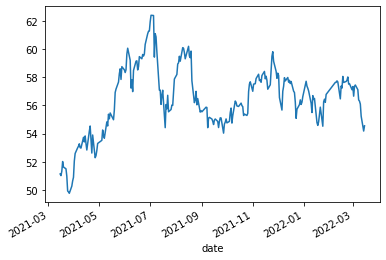

In [30]:
(weights*closePrice).sum(1).plot()